In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,recall_score ,accuracy_score,precision_score, roc_auc_score

In [2]:
df = pd.read_csv('heart.csv')
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.shape

(918, 12)

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [8]:
numerical_features=["Age","RestingBP","FastingBS","MaxHR","Oldpeak"]
categorical_features=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]
count_features=["Cholesterol","HeartDisease"]

In [53]:
for features in numerical_features:
    print(features.upper())
    print( "  ")
    print(df[features].describe())
    print("  ")
    print(df[features].value_counts())
    print("  ")

AGE
  
count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64
  
Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64
  
RESTINGBP
  
count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64
  
RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113 

In [10]:
for features in categorical_features:
    print(features.upper())
    print( "  ")
    print(df[features].unique())
    print("  ")
    print(df[features].value_counts())
    print("  ")

SEX
  
['M' 'F']
  
Sex
M    725
F    193
Name: count, dtype: int64
  
CHESTPAINTYPE
  
['ATA' 'NAP' 'ASY' 'TA']
  
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
  
RESTINGECG
  
['Normal' 'ST' 'LVH']
  
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
  
EXERCISEANGINA
  
['N' 'Y']
  
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
  
ST_SLOPE
  
['Up' 'Flat' 'Down']
  
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
  


In [11]:
for features in count_features:
    print(features.upper())
    print( "  ")
    print(df[features].unique())
    print("  ")
    print(df[features].value_counts())
    print("  ")

CHOLESTEROL
  
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285 280
 192 193 308 219 257 132 226 217 303 298 256 117 295 173 315 281 309 200
 336 355 326 171 491 271 274 394 221 126 305 220 242 347 344 358 169 181
   0 236 203 153 316 311 252 458 384 258 349 142 197 113 261 310 232 110
 123 170 369 152 244 165 337 300 333 385 322 564 239 293 407 149 199 417
 178 319 354 330 302 313 141 327 304 286 360 262 325 299 409 174 183 321
 353 335 278 157 176 131]
  
Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
39

# EDA

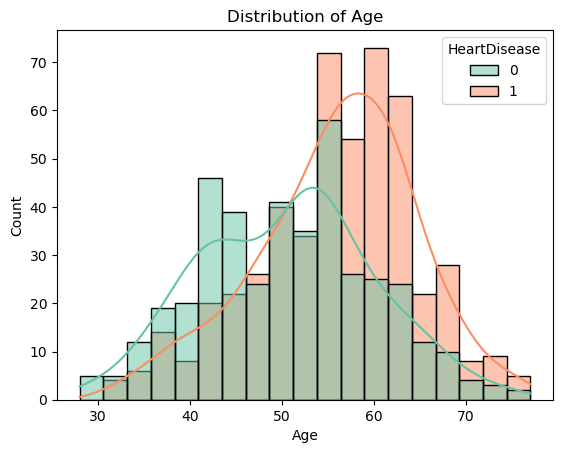

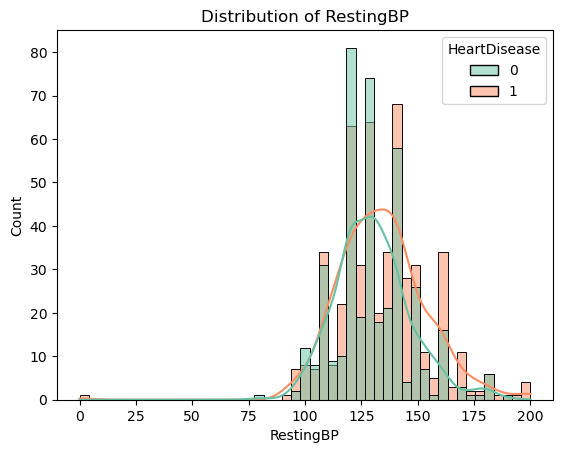

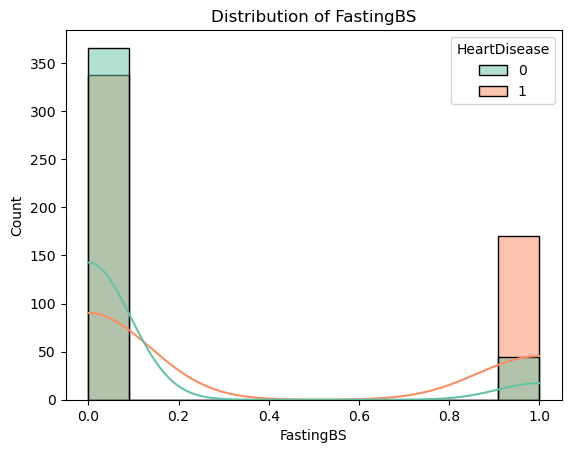

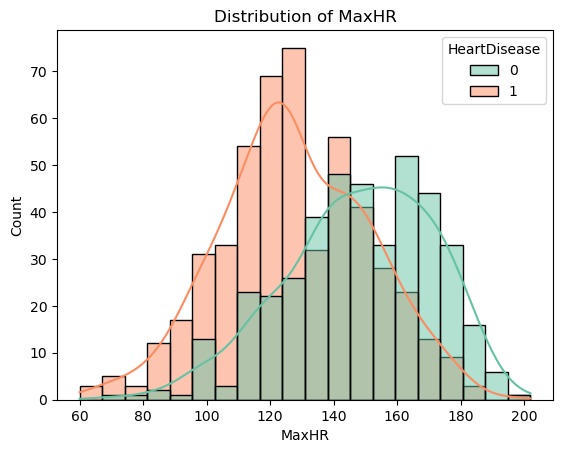

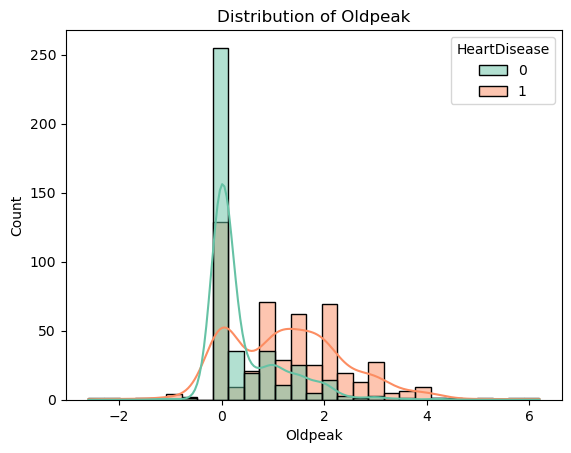

In [12]:
numerical_features

for features in numerical_features:
    plt.figure()
    sns.histplot(data=df,x=features,kde=True,hue="HeartDisease",palette="Set2")
    plt.title(f"Distribution of {features}")
    plt.show()

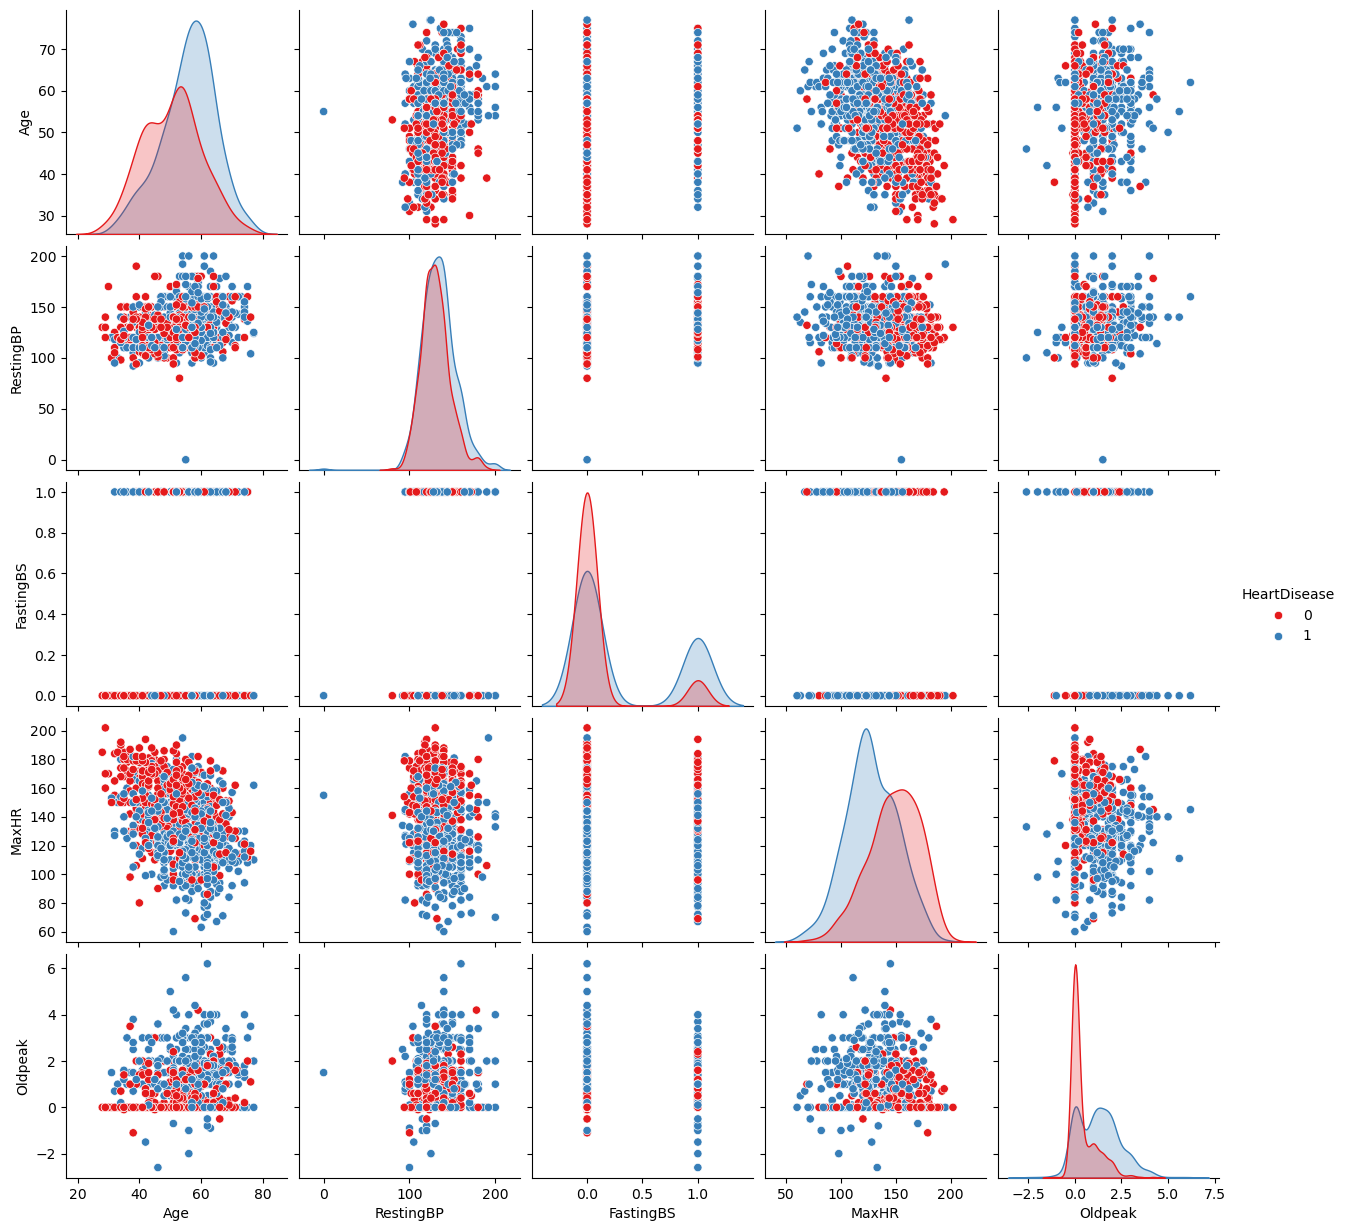

In [13]:
sns.pairplot(data=df, vars=numerical_features, hue="HeartDisease", palette="Set1")
plt.show()

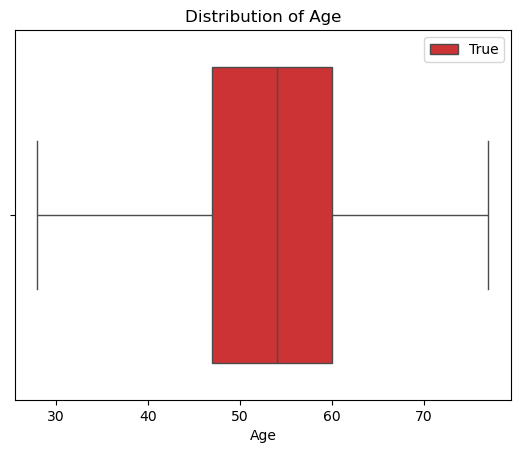

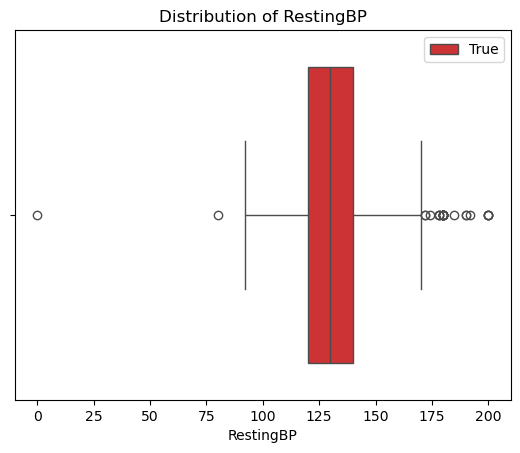

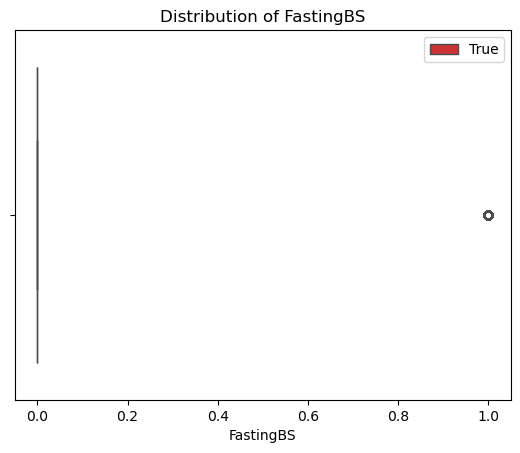

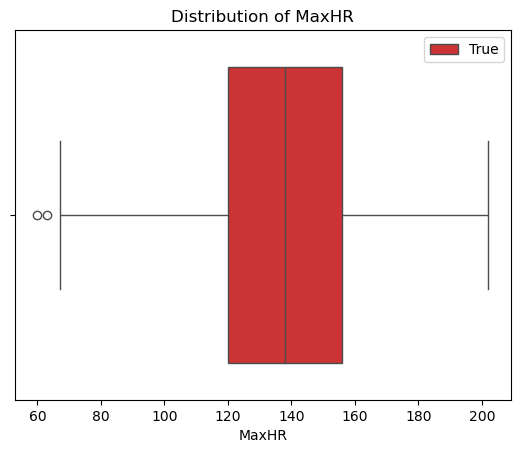

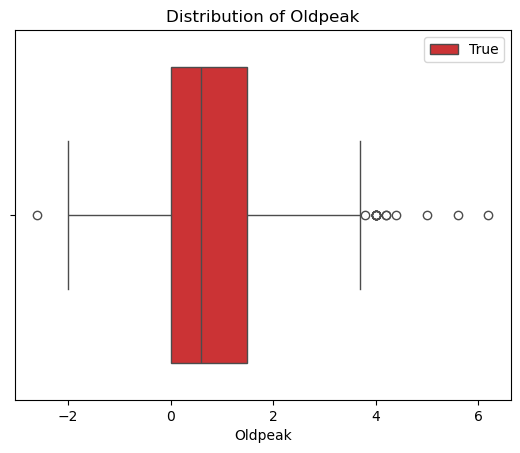

In [14]:
numerical_features

for features in numerical_features:
    plt.figure()
    sns.boxplot(data=df,x=features,hue=True,palette="Set1")
    plt.title(f"Distribution of {features}")
    plt.show()

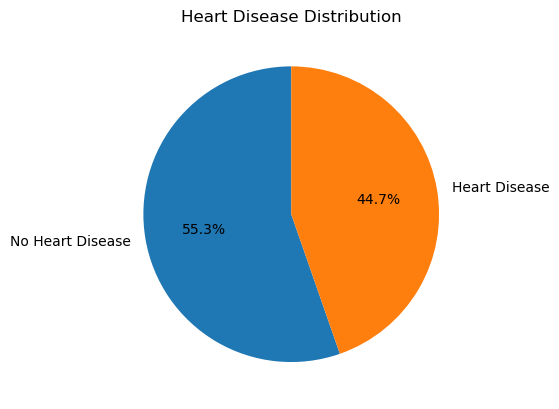

In [15]:
# Count the values for HeartDisease
heart_disease_counts = df['HeartDisease'].value_counts()
plt.figure()
plt.pie(
    heart_disease_counts, 
    labels=['No Heart Disease', 'Heart Disease'], 
    autopct='%1.1f%%', 
    startangle=90, 
)
plt.title('Heart Disease Distribution')
plt.show()

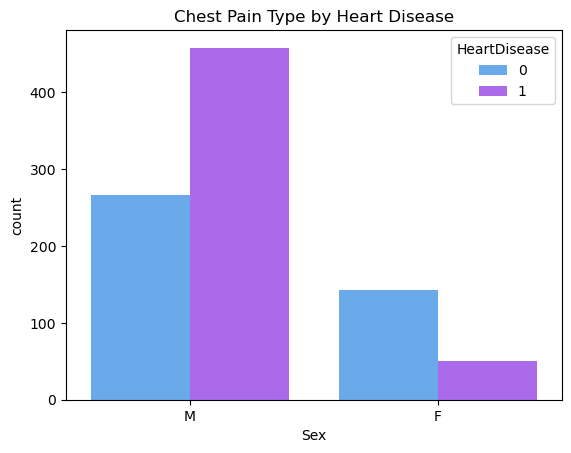

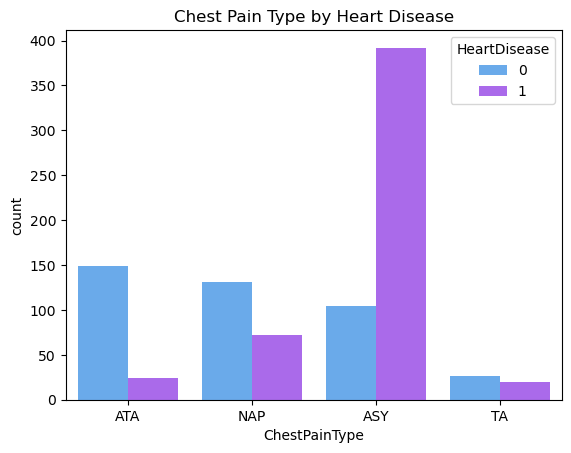

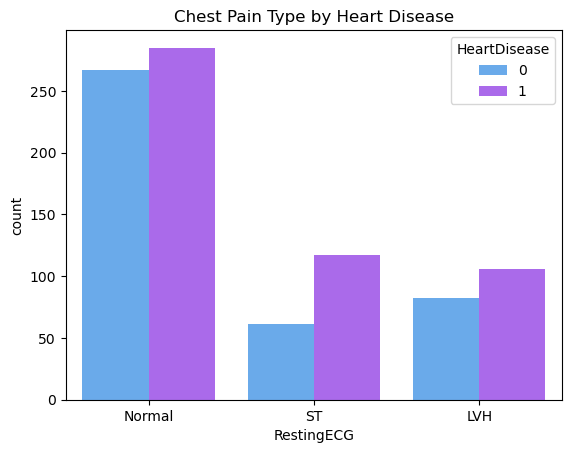

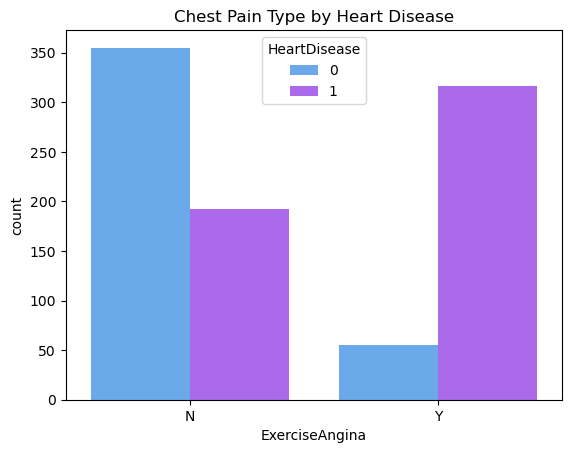

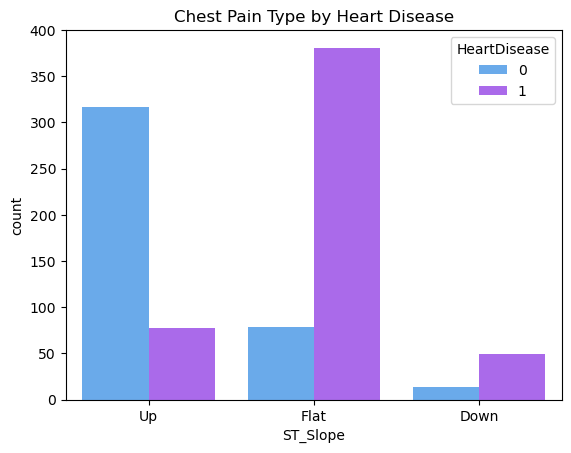

In [16]:
for feature in categorical_features:
    sns.countplot(data=df, x=feature, hue="HeartDisease", palette="cool")
    plt.title("Chest Pain Type by Heart Disease")
    plt.show()

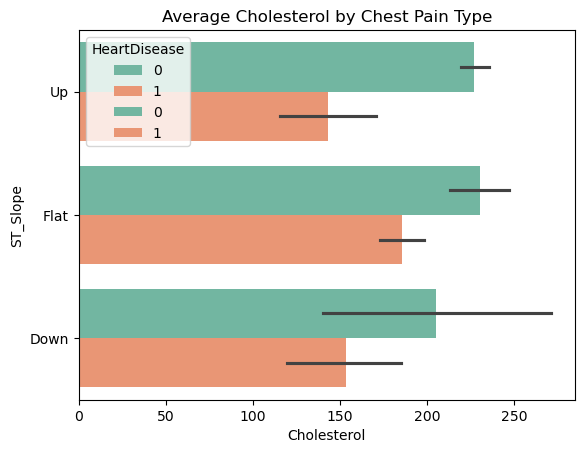

In [17]:
for c_feature in count_features:
    sns.barplot(data=df, x=c_feature,y=feature,hue='HeartDisease', palette='Set2')
    plt.title('Average Cholesterol by Chest Pain Type')

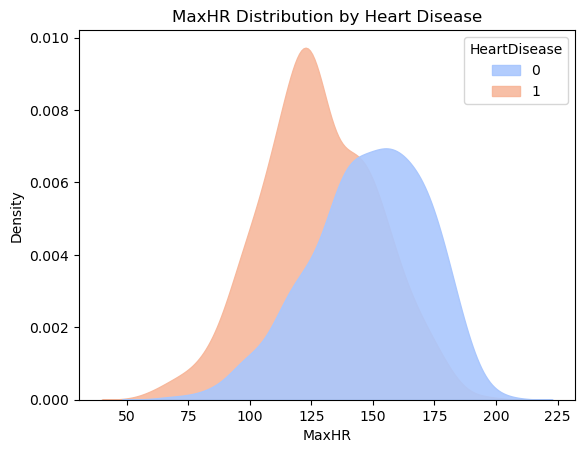

In [18]:
sns.kdeplot(data=df, x="MaxHR", hue="HeartDisease", fill=True, palette="coolwarm", alpha=0.9)
plt.title("MaxHR Distribution by Heart Disease")
plt.show()

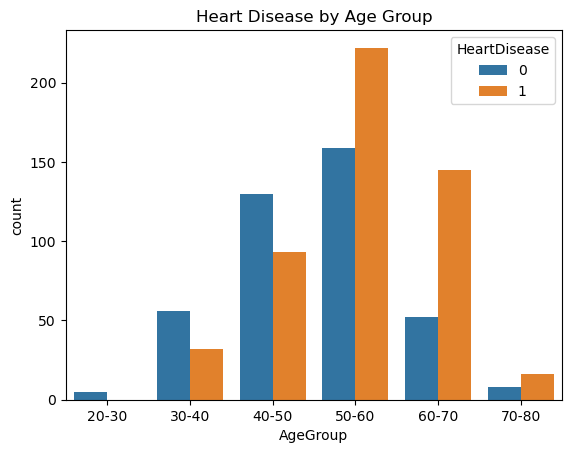

In [19]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[20, 30, 40, 50, 60, 70, 80], labels=["20-30", "30-40", "40-50", "50-60", "60-70", "70-80"])
sns.countplot(data=df, x="AgeGroup", hue="HeartDisease")
plt.title("Heart Disease by Age Group")
plt.show()

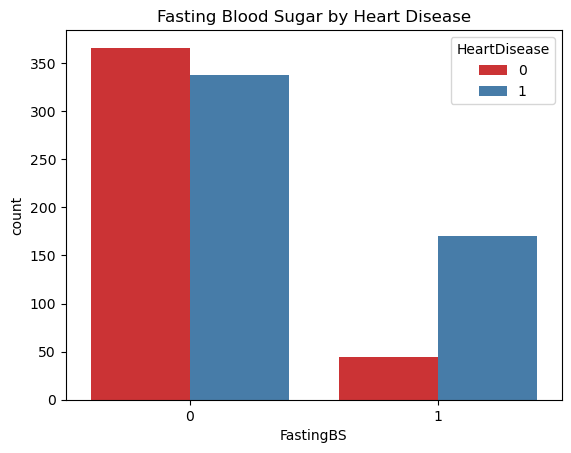

In [20]:
sns.countplot(data=df, x="FastingBS", hue="HeartDisease", palette="Set1")
plt.title("Fasting Blood Sugar by Heart Disease")
plt.show()

**Encoding Categorical**

In [21]:
lb=LabelEncoder()

for col in categorical_features:
    df[col] = lb.fit_transform(df[col])

In [22]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,40,1,1,140,289,0,1,172,0,0.0,2,0,30-40
1,49,0,2,160,180,0,1,156,0,1.0,1,1,40-50
2,37,1,1,130,283,0,2,98,0,0.0,2,0,30-40
3,48,0,0,138,214,0,1,108,1,1.5,1,1,40-50
4,54,1,2,150,195,0,1,122,0,0.0,2,0,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1,40-50
914,68,1,0,144,193,1,1,141,0,3.4,1,1,60-70
915,57,1,0,130,131,0,1,115,1,1.2,1,1,50-60
916,57,0,1,130,236,0,0,174,0,0.0,1,1,50-60


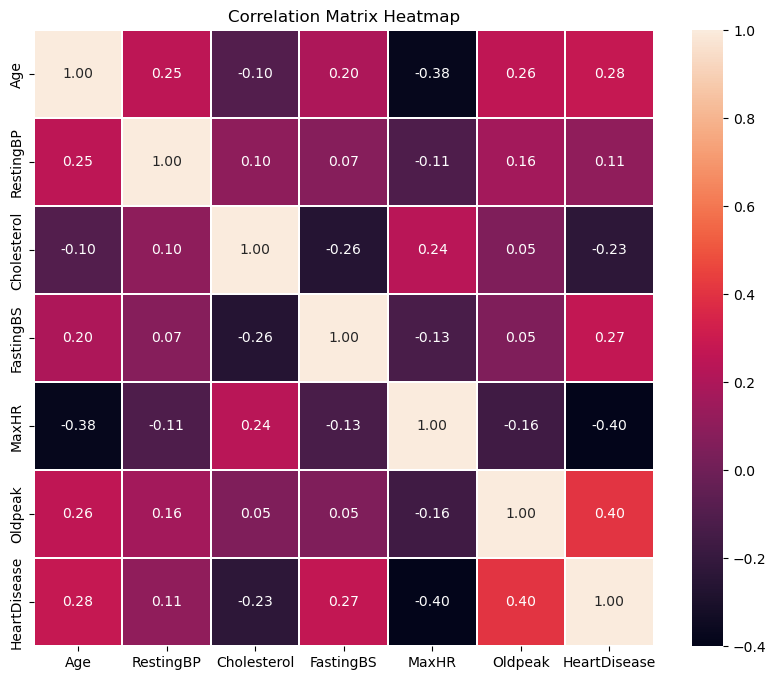

In [23]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.1, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [24]:
x= df.drop(['HeartDisease', 'AgeGroup'], axis=1)
y = df['HeartDisease']

In [25]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

x = sc.fit_transform(x)

In [26]:
Train=[]
cv=[]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

In [28]:
final_res =[]

In [29]:
# logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

# Train the model
LR.fit(x_train, y_train)

LogisticRegression()

In [31]:
y_pred_LR = LR.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_LR)
final_res.append(accuracy)

In [32]:
evaluate_model(y_test,y_pred_LR)

Accuracy: 0.8478260869565217
Precision: 0.9072164948453608
Recall: 0.822429906542056
ROC AUC: 0.8527733948294696


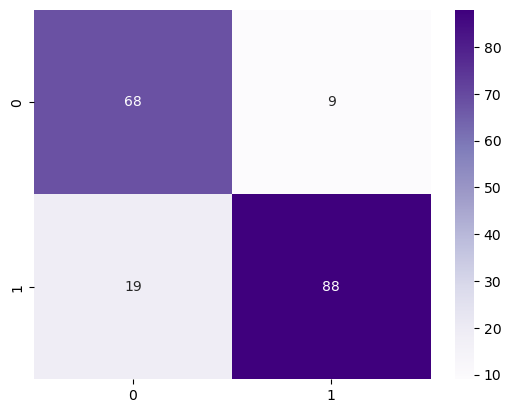

In [33]:
cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.show()


In [34]:
#ramdom forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred_RF = RF.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_RF)
final_res.append(accuracy)

In [37]:
evaluate_model(y_test,y_pred_RF)

Accuracy: 0.8804347826086957
Precision: 0.897196261682243
Recall: 0.897196261682243
ROC AUC: 0.8771695594125501


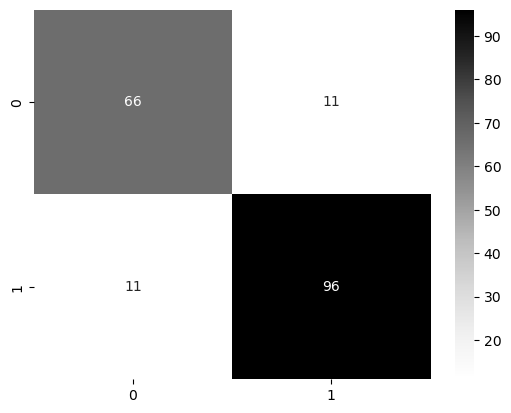

In [38]:
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys")
plt.show()

In [39]:
#SVM

In [40]:
from sklearn.svm import SVC
svm= SVC(random_state=42)

svm.fit(x_train, y_train)

SVC(random_state=42)

In [41]:
y_pred_svm = svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_svm)
final_res.append(accuracy)

In [42]:
evaluate_model(y_test,y_pred_svm)

Accuracy: 0.8641304347826086
Precision: 0.8942307692307693
Recall: 0.8691588785046729
ROC AUC: 0.863150867823765


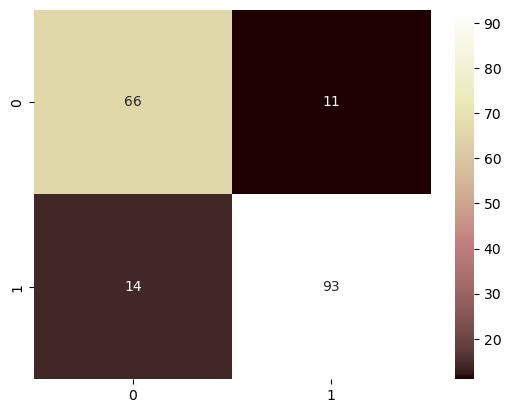

In [43]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="pink")
plt.show()

In [44]:
final=np.array(final_res)
result=final.reshape(3,1)
columns=['Accuracy']
index=['Logistic Regression','Random Forest','SVM']
final_result=pd.DataFrame(result,index=index,columns=columns)
final_result

,Accuracy
Logistic Regression,0.847826
Random Forest,0.880435
SVM,0.864130
